# Installing Dependencies

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset Q1

In [2]:
Data1 = pd.read_excel('dataset.xlsx',sheet_name = 0, engine='openpyxl')
Data1.head()

,Unnamed: 0,Diet,Control
0,1,13.58,12.12
1,2,13.84,11.19
2,3,14.31,10.81
3,4,13.08,9.63
4,5,12.62,12.89


**Data Pre-Processing**

In [3]:
Data1 = Data1.reset_index()
Data1 = Data1.drop(Data1.columns[1], axis = 1)
Data1 = Data1.drop(Data1.columns[0], axis = 1)
Data1.head()

,Diet,Control
0,13.58,12.12
1,13.84,11.19
2,14.31,10.81
3,13.08,9.63
4,12.62,12.89


In [4]:
print(Data1)

     Diet  Control
0   13.58    12.12
1   13.84    11.19
2   14.31    10.81
3   13.08     9.63
4   12.62    12.89
5   13.17    10.84
6   13.11     9.66
7   14.16     8.93
8   13.44    11.75
9   12.99    11.13
10  13.79    12.83
11  13.91    11.90
12  13.69     8.47
13  14.14    11.43
14  14.07     9.16
15  13.39    10.58
16  13.79     9.74
17  13.31    10.26
18  14.41    10.76
19  13.40    11.56
20  14.10    11.03
21  13.64     9.92
22  13.36     9.58
23  13.68    11.00
24  13.94    12.60
25  13.61    12.15
26  13.79    10.62
27  13.59     9.43
28  13.94    11.56
29  14.71     9.31
30  14.04    11.13
31  13.60    10.83
32  13.46     9.28
33    NaN     8.91
34    NaN     9.79
35    NaN    10.13
36    NaN    12.32


In [5]:
Data1['Diet'] = Data1['Diet'].interpolate()
print(Data1)

     Diet  Control
0   13.58    12.12
1   13.84    11.19
2   14.31    10.81
3   13.08     9.63
4   12.62    12.89
5   13.17    10.84
6   13.11     9.66
7   14.16     8.93
8   13.44    11.75
9   12.99    11.13
10  13.79    12.83
11  13.91    11.90
12  13.69     8.47
13  14.14    11.43
14  14.07     9.16
15  13.39    10.58
16  13.79     9.74
17  13.31    10.26
18  14.41    10.76
19  13.40    11.56
20  14.10    11.03
21  13.64     9.92
22  13.36     9.58
23  13.68    11.00
24  13.94    12.60
25  13.61    12.15
26  13.79    10.62
27  13.59     9.43
28  13.94    11.56
29  14.71     9.31
30  14.04    11.13
31  13.60    10.83
32  13.46     9.28
33  13.46     8.91
34  13.46     9.79
35  13.46    10.13
36  13.46    12.32


**Statistical Test**

In [6]:
control_group = Data1['Control']
diet_group = Data1['Diet']
t_statistic, p_value = stats.ttest_ind(control_group, diet_group)

alpha = 0.05  # Significance level

if p_value < alpha:
    print("The diet group has a significantly higher value than the control group.")
else:
    print("There is no significant difference between the diet and control groups.")

The diet group has a significantly higher value than the control group.


**Pictorial Representation**

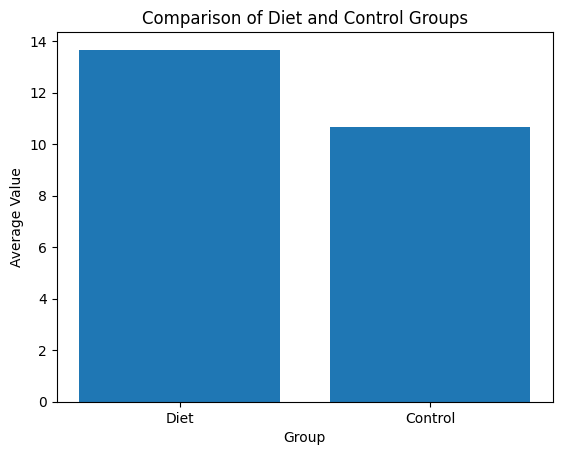

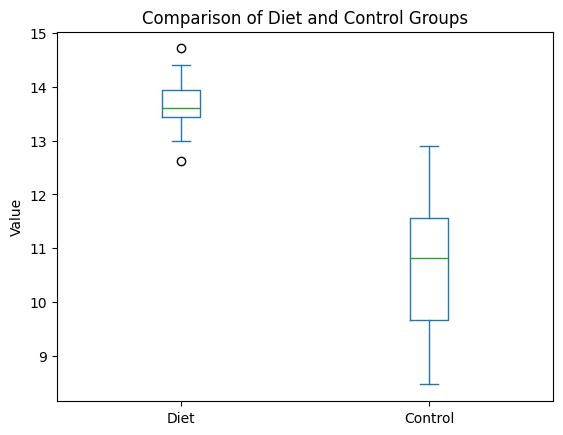

In [7]:
# Bar plot
plt.bar(['Diet', 'Control'], [Data1['Diet'].mean(), Data1['Control'].mean()])
plt.xlabel('Group')
plt.ylabel('Average Value')
plt.title('Comparison of Diet and Control Groups')
plt.show()

# Box plot
Data1.plot(kind='box')
plt.ylabel('Value')
plt.title('Comparison of Diet and Control Groups')
plt.show()

# Importing Dataset Q2

In [8]:
Data2 = pd.read_excel('dataset.xlsx',sheet_name = 1, engine='openpyxl')
Data2.head()

,Unnamed: 0,S01,S02,S03,S04,S05,S06,S07,S08,S09
0,1,772,1071,1118,967,1075,1145,866,1025,1186
1,2,755,1154,1233,730,1074,1214,786,1155,1140
2,3,934,1082,1178,982,1028,1102,777,1089,1248
3,4,681,927,1230,825,906,1242,880,1046,1143
4,5,1001,992,1117,821,1049,1313,864,909,958


In [9]:
Data2 = Data2.reset_index()
Data2 = Data2.drop(Data2.columns[1], axis = 1)
Data2 = Data2.drop(Data2.columns[0], axis = 1)
print(Data2)

     S01   S02   S03  S04   S05   S06   S07   S08   S09
0    772  1071  1118  967  1075  1145   866  1025  1186
1    755  1154  1233  730  1074  1214   786  1155  1140
2    934  1082  1178  982  1028  1102   777  1089  1248
3    681   927  1230  825   906  1242   880  1046  1143
4   1001   992  1117  821  1049  1313   864   909   958
5    650  1060  1269  867   840  1126   674  1338   995
6    748  1137  1118  947   941  1379   836  1058  1130
7    833   996  1221  950   984  1166   765   950  1002
8    721  1060  1385  702  1173  1352   880  1048  1197
9    827   980  1267  757  1066  1256   671  1017  1432
10   763  1165  1225  674   987  1413   881   999  1349
11   860  1042  1134  677   898  1100  1053  1105  1263
12   848   841  1284  892   986  1117   832  1156  1164
13   841  1024  1147  719  1004  1128   719  1058  1321
14   634   884  1108  734   942  1180   896   956  1200


**Changing Column names for better Grasp**

In [10]:
Data2 = Data2.rename(columns={'S01': 'Drug1Dose1', 'S02': 'Drug2Dose1','S03': 'Drug3Dose1', 'S04': 'Drug1Dose2','S05': 'Drug2Dose2', 'S06': 'Drug3Dose2','S07': 'Drug1Dose3', 'S08': 'Drug2Dose3','S09': 'Drug3Dose3'})
Data2.head()

,Drug1Dose1,Drug2Dose1,Drug3Dose1,Drug1Dose2,Drug2Dose2,Drug3Dose2,Drug1Dose3,Drug2Dose3,Drug3Dose3
0,772,1071,1118,967,1075,1145,866,1025,1186
1,755,1154,1233,730,1074,1214,786,1155,1140
2,934,1082,1178,982,1028,1102,777,1089,1248
3,681,927,1230,825,906,1242,880,1046,1143
4,1001,992,1117,821,1049,1313,864,909,958


**Statistical Test**

In [11]:
column_name = 'Drug1Dose1'

# Extract the drug and dosage frequency from the column name
drug = column_name[:-6]
dosage = column_name[-6:]

# Extract the values for each group based on the drug and dosage
groups = [Data2[column_name.replace(drug, f'Drug{i+1}').replace(dosage, f'Dose{j+1}')] 
          for i in range(3) for j in range(3)]

# Perform the ANOVA test
f_value, p_value = stats.f_oneway(*groups)

# Interpret the result
alpha = 0.05  # Significance level

if p_value < alpha:
    print("There is a significant difference between the drug dosage groups.")
    best_group_index = np.argmin(p_value)
    best_group = groups[best_group_index]
    best_drug_dosage = Data2.columns[best_group_index]
    best_drug = best_drug_dosage.split('Dose')[0]
    best_dosage = best_drug_dosage.split('Dose')[1]
    print(f"The best drug and dosage for decreasing the value is {best_drug} at Dose{best_dosage}.")
else:
    print("There is no significant difference between the drug dosage groups.")

There is a significant difference between the drug dosage groups.
The best drug and dosage for decreasing the value is Drug1 at Dose1.


**Plotting the Difference**

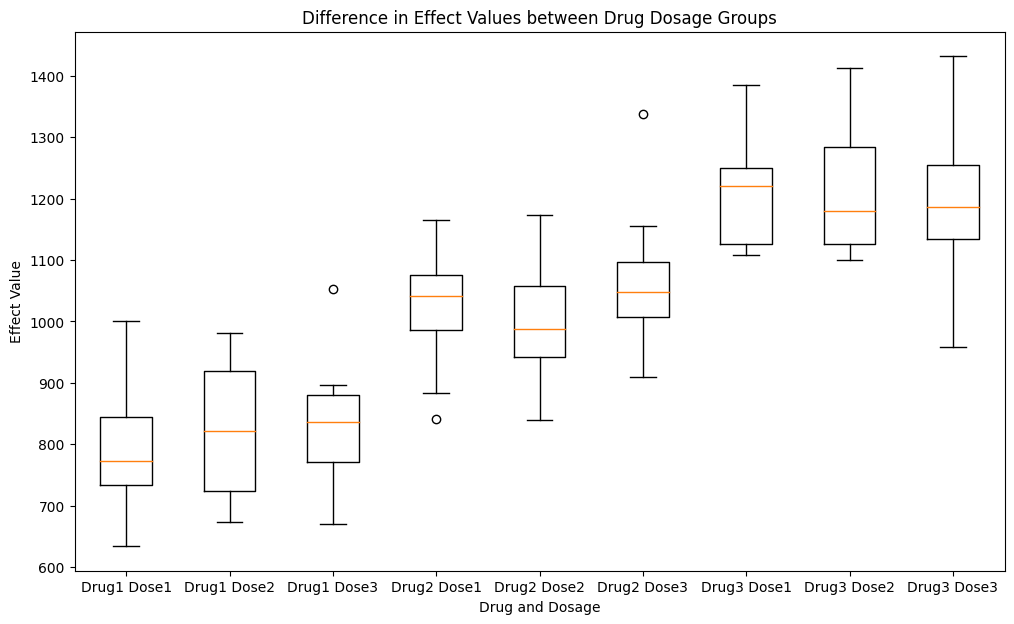

In [12]:
plt.figure(figsize=(12, 7))
plt.boxplot(groups, labels=[f"Drug{i+1} Dose{j+1}" for i in range(3) for j in range(3)])
plt.xlabel("Drug and Dosage")
plt.ylabel("Effect Value")
plt.title("Difference in Effect Values between Drug Dosage Groups")
plt.show()

# Importing Dataset Q3

In [13]:
Data3 = pd.read_excel('dataset.xlsx',sheet_name = 2, engine='openpyxl')
Data3.head()

,Unnamed: 0,C_level,T_cell
0,1,1314.8,1993
1,2,1579.2,2095
2,3,1204.4,1909
3,4,1813.2,2173
4,5,1057.6,1818


In [14]:
Data3 = Data3.reset_index()
Data3 = Data3.drop(Data3.columns[1], axis = 1)
Data3 = Data3.drop(Data3.columns[0], axis = 1)
print(Data3)

    C_level  T_cell
0    1314.8    1993
1    1579.2    2095
2    1204.4    1909
3    1813.2    2173
4    1057.6    1818
..      ...     ...
95   1122.1    1960
96   1296.1    1963
97   1738.2    2173
98   1641.8    2246
99   1286.0    1802

[100 rows x 2 columns]


**Statistical Test**

In [15]:
x = Data3['C_level']
y = Data3['T_cell']

# Perform the Pearson correlation test
corr_coef, p_value = stats.pearsonr(x, y)

# Interpret the result
alpha = 0.05  # Significance level

if p_value < alpha:
    print("There is a significant correlation between Column1 and Column2.")
    print(f"Pearson correlation coefficient: {corr_coef:.2f}")
else:
    print("There is no significant correlation between Column1 and Column2.")

There is a significant correlation between Column1 and Column2.
Pearson correlation coefficient: 0.94


**Plotting the Regression Line**

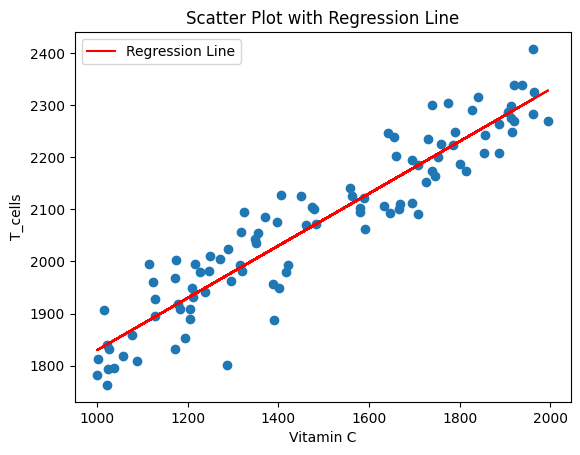

In [16]:
# Calculate the regression line
regression_line = np.polyfit(x, y, 1)
line = regression_line[0] * x + regression_line[1]

# Create a scatter plot with the regression line
plt.scatter(x, y)
plt.plot(x, line, color='red', label='Regression Line')
plt.xlabel('Vitamin C')
plt.ylabel('T_cells')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()